<a href="https://colab.research.google.com/github/unmiulast/Tokyo/blob/main/10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

import sklearn

%precision 3

'%.3f'

In [2]:
#ホールドアウト法
#学習データを既知のデータとみなし、テストデータを未知のデータとみなすことで、その未知のデータにおける性能を評価する
#データ数が十分大きい時には、モデルの評価方法として実用的に使えます。
#データ数が限られるとき学習データ数が削られ、肝心の学習が十分に進まないという問題

#限られたデータを最大限に活用しようと考案されたのが交差検証法（cross validation）
#検証用に使うブロックはkパターンあるので、たまたまある検証用データで評価が高まるという問題を低減できます
#kパターン繰り返しているので、検証用データを除外することなく手元データを一通り学習に反映させている
#1個抜き交差検証（leave-one-out）k分割交差検証のkをデータサンプル数と同数に設定する点が特徴,かなりデータが少ない場合はこの手法を使うことがあります。

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cancer = load_breast_cancer()

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

#k分割交差検証の実行
scores = cross_val_score(tree, cancer.data, cancer.target, cv = 5)

#基本的に、平均スコアの高いモデルを採用しますが、標準偏差が大きいときは、平均スコアから標準偏差を引いたスコアでモデルを選択してもよいでしょう。
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(),scores.std()))

Cross validation scores: [0.904 0.912 0.956 0.939 0.956]
Cross validation scores: 0.933+-0.022


In [3]:
from sklearn.linear_model import LogisticRegression

model  = LogisticRegression()

scores = cross_val_score(model, cancer.data, cancer.target, cv = 5)

print('Cvs:{}'.format(scores))
print('Cvs: {:.3f}+-{:.3f}'.format(scores.mean(),scores.std()))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cvs:[0.93  0.939 0.965 0.93  0.956]
Cvs: 0.944+-0.014


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

ベストスコア:0.91
そのときのパラメータ(gamma,C):(np.float64(0.001), np.float64(1.0))


<Axes: >

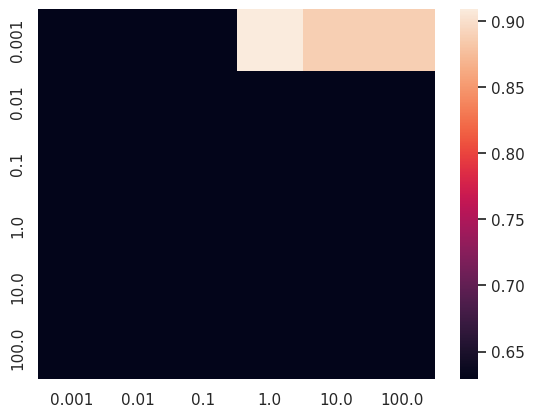

In [4]:
#グリッドサーチ（grid search）アルゴリズムが固有に持つハイパーパラメータのチューニング手法
#あらかじめ人が実装の都合上決めたもので、ハイパーパラメータといって区別します。
#決定木であれば木の深さ、リッジ回帰であれば正則化の強さを決めるパラメータなどがハイパーパラメータ
#グリッドサーチは、注目するいくつかのハイパーパラメータのすべての組み合わせについて交差検証を行い、
#最も性能の高いパラメータの組み合わせを探索してベストモデルの学習をするもの

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

#ハイパーパラメータの全ての組み合わせでモデル構築・検証
#np.logsppace(-3,2,num = 6) [0.001,0.01, 0.1, 1, 10, 100]
scores = {}
for gamma in np.logspace(-3,2,num = 6):
  for C in np.logspace(-3,2, num = 6):
    svm = SVC(gamma = gamma, C = C)
    svm.fit(X_train,y_train)
    scores[(gamma,C)] = svm.score(X_test,y_test)

#結果をscoresに格納
scores = pd.Series(scores)

print('ベストスコア:{:.2f}'.format(scores.max()))
print('そのときのパラメータ(gamma,C):{}'.format(scores.idxmax()))

sns.heatmap(scores.unstack())

In [5]:
from sklearn.model_selection import GridSearchCV

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

param_grid = {'C': np.logspace(-3,2, num = 6),
              'gamma':np.logspace(-3,2, num = 6)
}

gs = GridSearchCV(estimator = SVC(),
                  param_grid = param_grid,
                  cv = 5)

gs.fit(X_train, y_train)

print('Best cross validation score: {:.3f}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))
print('Test score: {:.3f}'.format(gs.score(X_test, y_test)))

Best cross validation score: 0.925
Best parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.001)}
Test score: 0.909


In [6]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

param_grid = {'max_depth': [2,3,4,5],
              'min_samples_leaf':[2,3,4,5]}

gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 0),
                  param_grid = param_grid,
                  cv = 5)

gs.fit(X_train,y_train)

print('テストデータにおけるスコア: {:.3f}'.format(gs.score(X_test,y_test)))
print('ベストなパラメータ: {}'.format(gs.best_params_))
print('ベストなross-validation score: {:.3f}'.format(gs.best_score_))

テストデータにおけるスコア: 0.923
ベストなパラメータ: {'max_depth': 4, 'min_samples_leaf': 5}
ベストなross-validation score: 0.941


In [7]:
#汎化性能が低いケース（underfitting）では、一般的に、特徴量を増やせないかを検討します。
#新しくデータを収集し全く新しい特徴量を追加する
#特徴量の計算期間にバリエーションを持たせる
#特徴量同士の比率を追加するなどの工夫を凝らす

In [8]:
#過学習が疑われる場合は、上記の学習不足の場合とは逆に、特徴量の数を減らすことを検討するのが一般的です。
#特徴量の数を削ることを次元削減（dimension reduction）
#次元削減は2つに分類されます。1つは特徴量のサブセットを選択する特徴選択（feature selection）、
#もう1つは元の特徴空間軸を別の空間軸に変換する特徴抽出（feature extraction）


In [9]:
#混同行列（confusion matrix）
#分類モデルの評価を考える際の基本となる行列で、モデルの予測値と観測値の関係を表したもの

from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

model = SVC(gamma = 0.001, C = 1)
model.fit(X_train, y_train)

print('{} train score: {:.3f}'.format(model.__class__.__name__, model.score(X_train, y_train)))
print('{} test score: {:.3f}'.format(model.__class__.__name__, model.score(X_test, y_test)))

SVC train score: 0.979
SVC test score: 0.909


In [10]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n{}'.format(m))

Confusion matrix:
[[48  5]
 [ 8 82]]


In [11]:
#正解率
accuracy =(m[0,0] +m[1,1]) / m.sum()
print('正解率: {:.3f}'.format(accuracy))

正解率: 0.909


In [12]:
#適合率(1と予想したなかでどれだけ合ってたか)
precision = (m[1,1]) / m[:,1].sum()
print('適合率: {:.3f}'.format(precision))

適合率: 0.943


In [13]:
#再現率(実際は1のデータのうち正しく1と予測できた割合)
recall = (m[1,1]) / m[1, :].sum()
print('再現率: {:.3f}'.format(recall))

再現率: 0.911


In [14]:
#F1スコア(適合率と再現率の調和平均)
f1 = 2 * (precision * recall) / (precision + recall)

print('F1値: {:.3f}'.format(f1))

F1値: 0.927


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('適合率: {:.3f}'.format(precision_score(y_test, y_pred)))
print('再現率: {:.3f}'.format(recall_score(y_test,y_pred)))
print('F1値: {:.3f}'.format(f1_score(y_test, y_pred)))

適合率: 0.943
再現率: 0.911
F1値: 0.927


In [16]:
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

model = LogisticRegression(random_state = 0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

c = confusion_matrix(y_test, y_pred)
print('混同行列: {}'.format(c))

混同行列: [[48  5]
 [ 5 85]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import accuracy_score
print('正解率:{:.3f}'.format(accuracy_score(y_test,y_pred)))
print('適合率:{:.3f}'.format(precision_score(y_test,y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test,y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test,y_pred)))

正解率:0.930
適合率:0.944
再現率:0.944
F1値:0.944


In [18]:
#ROC曲線
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

model = LogisticRegression(random_state = 0)
model.fit(X_train,y_train)

results = pd.DataFrame(model.predict_proba(X_test), columns = cancer.target_names)

results

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,malignant,benign
0,0.006029,0.993971
1,0.000576,0.999424
2,0.037966,0.962034
3,0.010463,0.989537
4,0.006312,0.993688
...,...,...
138,0.053942,0.946058
139,0.014132,0.985868
140,0.032411,0.967589
141,0.702110,0.297890


In [19]:
#良性(benign)の閾値が0.4,0.3,0.15,0.05の4パターンを考える
for threshold in [0.4, 0.3, 0.15, 0.05]:
  results[f'flag_{threshold}'] = results['benign'].map(lambda x: 1 if x > threshold else 0)

results

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.006029,0.993971,1,1,1,1
1,0.000576,0.999424,1,1,1,1
2,0.037966,0.962034,1,1,1,1
3,0.010463,0.989537,1,1,1,1
4,0.006312,0.993688,1,1,1,1
...,...,...,...,...,...,...
138,0.053942,0.946058,1,1,1,1
139,0.014132,0.985868,1,1,1,1
140,0.032411,0.967589,1,1,1,1
141,0.702110,0.297890,0,0,1,1


<Axes: xlabel='false positive rate', ylabel='true positive rate'>

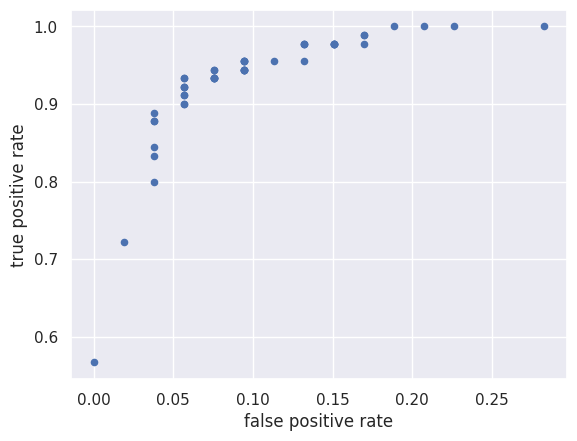

In [20]:
#閾値を0.01から0.99の間で50通りとして，偽陽性率と真陽性率を計算

rates = {}

for threshold in np.linspace(0.01,0.99,num = 50):
  labels = results['benign'].map(lambda x: 1 if x > threshold else 0)
  m = confusion_matrix(y_test, labels)
  rates[threshold] = {'false positive rate': m[0,1] /m[0,:].sum(),
                      'true positive rate': m[1,1] / m[1,:].sum()}

pd.DataFrame(rates).T.plot.scatter('false positive rate', 'true positive rate')

In [21]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state =66)

#SVCによる予測確率の取得
model = svm.SVC(kernel = 'linear', probability = True, random_state = 0)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]

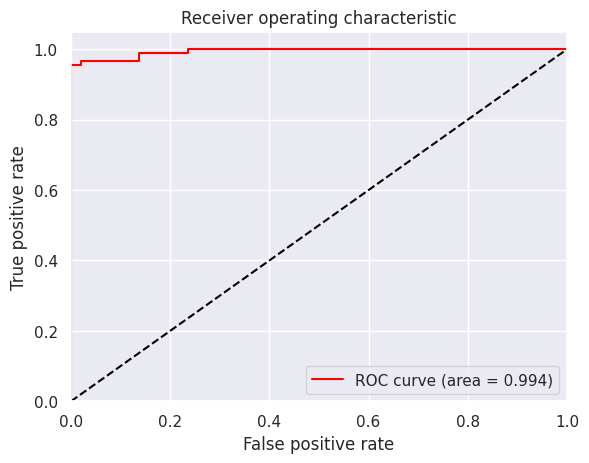

In [22]:
#偽陽性率と真陽性率の算出
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color ='red',label = 'ROC curve (area = %.3f)' % auc)
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'best')

In [23]:
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing()

X = pd.DataFrame(df.data, columns = df.feature_names)
y = pd.Series(df.target, name ='HousingPrices')

X.join(y).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousingPrices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

#標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(random_state = 0),
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state = 0),
    'LinearSVR':LinearSVR(random_state = 0)
    }

scores = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, 'MSE')] = mean_squared_error(y_test, model.predict(X_test))
  scores[(model_name, 'MAE')] = mean_absolute_error(y_test, model.predict(X_test))
  scores[(model_name, 'MedAE')] = median_absolute_error(y_test, model.predict(X_test))
  scores[(model_name, 'R2')] = r2_score(y_test, model.predict(X_test))

pd.Series(scores).unstack()

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,MAE,MSE,MedAE,R2
DecisionTreeRegressor,0.476206,0.553313,0.274000,0.581410
LinearRegression,0.536895,0.540413,0.418767,0.591170
LinearSVR,0.527155,4.696266,0.346801,-2.552796
Ridge,0.536895,0.540422,0.418641,0.591163


In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify = cancer.target, random_state = 66)

#引数n_estimatorsを100として、k-NNのモデルを100個でバギング
models = {
    'kNN':KNeighborsClassifier(),
    'bagging':BaggingClassifier(KNeighborsClassifier(), n_estimators = 100, random_state = 0)
}

scores = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, 'train_score')] = model.score(X_train, y_train)
  scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()



,test_score,train_score
bagging,0.937063,0.950704
kNN,0.923077,0.948357


In [31]:
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    stratify = iris.target, random_state = 0)

model = BaggingClassifier(KNeighborsClassifier(),
                          n_estimators = 10,
                          max_samples = 0.5,
                          max_features = 0.5)

model.fit(X_train, y_train)

print('正解率(train):{} {:.3f}'.format(model.__class__.__name__,model.score(X_train, y_train)))
print('正解率(test):{} {:.3f}'.format(model.__class__.__name__,model.score(X_test, y_test)))

正解率(train):BaggingClassifier 0.955
正解率(test):BaggingClassifier 1.000


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

df = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target,
                                                    random_state = 66)

models = {
    'tree': DecisionTreeRegressor(random_state = 0),
    'AdaBoost':AdaBoostRegressor(DecisionTreeRegressor(), random_state = 0)
}

scores = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, 'train_score')] = model.score(X_train,y_train)
  scores[(model_name, 'test_score')] = model.score(X_test,y_test)

pd.Series(scores).unstack()

,test_score,train_score
AdaBoost,0.821205,0.999373
tree,0.613043,1.000000


In [35]:
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,
                                                    stratify = iris.target, random_state = 0)
model = AdaBoostClassifier(n_estimators = 10, learning_rate = 0.5)
model.fit(X_train,y_train)
print('正解率(train):{} {:.3f}'.format(model.__class__.__name__,model.score(X_train,y_train)))
print('正解率(test):{} {:.3f}'.format(model.__class__.__name__,model.score(X_test,y_test)))

正解率(train):AdaBoostClassifier 0.955
正解率(test):AdaBoostClassifier 0.947


In [38]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

df = fetch_california_housing()

X_train, X_test, y_train,y_test = train_test_split(df.data,df.target,random_state = 66)

models = {
    'RandomForest':RandomForestRegressor(random_state = 0),
    'GradientBoost':GradientBoostingRegressor(random_state = 0)
}

scores = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, 'train_score')] = model.score(X_train,y_train)
  scores[(model_name, 'test_score')] = model.score(X_test,y_test)

pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.795131,0.808224
RandomForest,0.812549,0.972619


<Axes: >

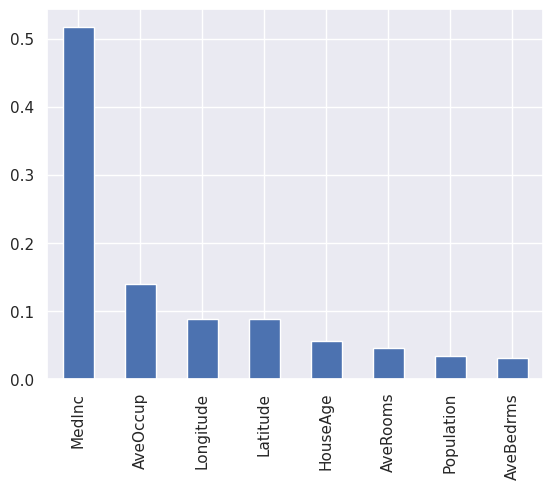

In [41]:
s = pd.Series(models['RandomForest'].feature_importances_,
              index = df.feature_names)

s.sort_values(ascending = False).plot.bar(color = 'C0')

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

iris = load_iris()

X_train, X_test, y_train,y_test = train_test_split(iris.data, iris.target,random_state = 0)

models = {
    'RandomForest':RandomForestClassifier(n_estimators = 100,random_state = 0),
    'GradientBoost':GradientBoostingClassifier(random_state = 0)
}

scores = {}
for model_name, model in models.items():
  model.fit(X_train,y_train)
  scores[(model_name,'train_score')] = model.score(X_train, y_train)
  scores[(model_name,'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.973684,1.0
RandomForest,0.973684,1.0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

cancer = load_breast_cancer()

X_train, X_test,y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target,random_state = 0)

models = {
    'Logistic': LogisticRegression(random_state = 0),
    'Tree': DecisionTreeClassifier(random_state = 0),
    'k-NN': KNeighborsClassifier(),
    'SVM': LinearSVC(random_state = 0),
    'RandomForest': RandomForestClassifier(random_state = 0),
    'GradientBoost':GradientBoostingClassifier(random_state = 0)
}

scores = {}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, 'train_score')] = model.score(X_train,y_train)
  scores[(model_name, 'test_score')] = model.score(X_test,y_test)

pd.Series(scores).unstack()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,test_score,train_score
GradientBoost,0.958042,1.000000
Logistic,0.930070,0.960094
RandomForest,0.944056,0.997653
SVM,0.937063,0.971831
Tree,0.902098,1.000000
k-NN,0.916084,0.946009
